In [29]:
import json
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from json_to_dataframes import json_to_dataframes

dataframes = json_to_dataframes("data/2022_mix2_rep1.json")

fragments_dataframe = dataframes[0]
spectra_dataframe = dataframes[1]

fragments_dataframe.head()
fragments_dataframe.info()
#fragments_dataframe.keys()
#spectra_dataframe.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555911 entries, 0 to 555910
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   frag_seq                     555911 non-null  object 
 1   frag_type1                   555911 non-null  object 
 2   frag_type2                   555911 non-null  object 
 3   position_frag_type1          555911 non-null  int64  
 4   position_frag_type2          555911 non-null  int64  
 5   frag_length                  555911 non-null  int64  
 6   frag_charge                  555911 non-null  int64  
 7   frag_intensity               555911 non-null  float64
 8   frag_mz                      555911 non-null  float64
 9   perc_of_total_intensity      555911 non-null  float64
 10  prop_intensity_to_base_peak  555911 non-null  float64
 11  modification                 555911 non-null  object 
 12  scan_number                  555911 non-null  int64  
 13 

In [ ]:
##### DO NOT EXECUTE
json_file = "data/2022_mix2_rep1.json"
with open(json_file, "r", encoding = "utf-8") as f:
        data = json.load(f)
        f.close()
        

# Summarize fragment ions over all spectra

all_ions = pd.DataFrame()
for i in data[1:10000]:
    all_ions = pd.concat([all_ions, pd.DataFrame.from_dict(i['annotation'])])
all_ions.info()
all_ions

# separate ion types, ...
all_ions[['frag_types', 'frag_rest']] = all_ions.theoretical_code.str.split("@", expand = True)
all_ions[['frag_type_1', 'frag_type_2']] = all_ions.frag_types.str.split(":", expand = True)
all_ions[['frag_length', 'frag_rest']] = all_ions.frag_rest.str.split("(", expand = True)
all_ions[['position_frag_type_1', 'position_frag_type_2']] = all_ions.frag_length.str.split(":", expand = True)
all_ions['frag_length'] =  all_ions.position_frag_type_2.astype(float) - all_ions.position_frag_type_1.astype(float) + 1





In [ ]:
#### Visualizations
common_type = fragments_dataframe['frag_type1'].astype(str).str.cat(fragments_dataframe['frag_type2'], sep='-')
common_type = common_type.replace("n", "not annotated", regex=True)
common_type = common_type.replace("t-","",regex=True)
common_type = common_type.replace("-t","",regex=True)
counts = common_type.value_counts()
fragments_dataframe['frag_types'] = common_type
# Frequency of ion types
fig = go.Figure([go.Histogram(x=common_type)])
fig.show()
fig = go.Figure([go.Pie(labels=counts.keys(), values=counts)])
fig.show()



In [ ]:
# intensity distribution of different ions
# density or probability
histnorm = "probability"
types = fragments_dataframe["frag_types"].unique() 
print(types)
histograms = list()
for t in types:
    histograms.append(go.Histogram(x=np.log(fragments_dataframe[fragments_dataframe.frag_types == t].frag_intensity),histnorm=histnorm, name=t, nbinsx=50))
fig = go.Figure(histograms)
fig.update_layout(
    barmode='group',
    title="Histograms of logarithmic intensities per ion type",
    xaxis_title="log2(intensity)",
    yaxis_title=histnorm)
fig.show()


## Try ridgelines
fig = go.Figure()
for t in types:
    fig.add_trace(go.Violin(x=np.log(fragments_dataframe[fragments_dataframe.frag_types == t].frag_intensity),name=t))
fig.update_traces(orientation='h', side='positive', width=3, points=False)    
fig.update_layout(
    barmode='group',
    title="Ridgelines of logarithmic intensities per ion type",
    xaxis_title="log2(intensity)",
    yaxis_title=histnorm)
fig.show()


# relative intensity to total intensity distribution of different ions
# density or probability
histnorm = "probability"
types = fragments_dataframe["frag_types"].unique() 
print(types)
histograms = list()
for t in types:
    histograms.append(go.Histogram(x=fragments_dataframe[fragments_dataframe.frag_types == t].perc_of_total_intensity,histnorm=histnorm, name=t, nbinsx=50))
fig = go.Figure(histograms)
fig.update_layout(
    barmode='group',
    title="Histograms of relative intensities per ion type",
    xaxis_title="intensity",
    yaxis_title=histnorm)
fig.show()

## Try ridgelines
fig = go.Figure()
for t in types:
    fig.add_trace(go.Violin(x=fragments_dataframe[fragments_dataframe.frag_types == t].perc_of_total_intensity,name=t))
fig.update_traces(orientation='h', side='positive', width=3, points=False)    
fig.update_layout(
    barmode='group',
    title="Ridgelines of relative intensities per ion type",
    xaxis_title="intensity",
    yaxis_title=histnorm)
fig.show()


# relative intensity to total intensity distribution of different ions
# density or probability
histnorm = "probability"
types = fragments_dataframe["frag_types"].unique() 
print(types)
histograms = list()
for t in types:
    histograms.append(go.Histogram(x=fragments_dataframe[fragments_dataframe.frag_types == t].prop_intensity_to_base_peak,histnorm=histnorm, name=t, nbinsx=50))
fig = go.Figure(histograms)
fig.update_layout(
    barmode='group',
    title="Histograms of relative intensities to base peak per ion type",
    xaxis_title="Percentage per base peak",
    yaxis_title=histnorm)
fig.show()

## Try ridgelines
fig = go.Figure()
for t in types:
    fig.add_trace(go.Violin(x=fragments_dataframe[fragments_dataframe.frag_types == t].prop_intensity_to_base_peak,name=t))
fig.update_traces(orientation='h', side='positive', width=3, points=False)    
fig.update_layout(
    barmode='group',
    title="Ridgelines of relative intensities to base peak per ion type",
    xaxis_title="intensity",
    yaxis_title=histnorm)
fig.show()





In [ ]:
# mz distribution of different ion types
# density or probability
histnorm = "probability"
types = fragments_dataframe["frag_types"].unique() 
print(types)
histograms = list()
for t in types:
    histograms.append(go.Histogram(x=fragments_dataframe[fragments_dataframe.frag_types == t].frag_mz, histnorm=histnorm, name=t, nbinsx=50))
fig = go.Figure(histograms)
fig.update_layout(
    barmode='group',
    title="Histograms of mz values per ion type",
    xaxis_title="mz",
    yaxis_title=histnorm)
fig.show()



In [ ]:
### Percentages of different ion types per spectrum
histnorm = "probability"
types = ["internal","terminal","other"]
print(types)
histograms = list()
for t in types:
    histograms.append(go.Histogram(x=spectra_dataframe["perc_" + t], histnorm=histnorm, name=t, nbinsx=50))
fig = go.Figure(histograms)
fig.update_layout(
    barmode='group',
    title="Histograms of percentages of ion type per spectrum",
    xaxis_title="Percentage",
    yaxis_title=histnorm)
fig.show()

### Same for intensities
histograms = list()
for t in types:
    histograms.append(go.Histogram(x=spectra_dataframe["total_int_" + t], histnorm=histnorm, name=t, nbinsx=50))
fig = go.Figure(histograms)
fig.update_layout(
    barmode='group',
    title="Histograms of percentages of ion type per spectrum",
    xaxis_title="Percentage",
    yaxis_title=histnorm)
fig.show()



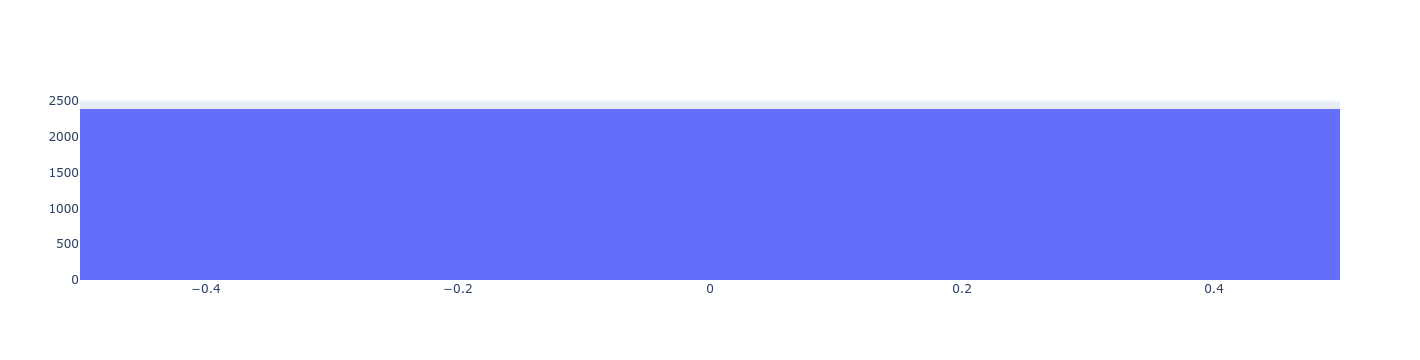

In [24]:
## Distributions of total intensitis of ion types in spectra
# Filter for all single amino acid fragments
spectra_dataframe.intensity_explained_aa
go.Figure(go.Histogram(x=spectra_dataframe.intensity_explained_aa))

## Now frequency per 


In [28]:
go.Figure(go.Histogram(x=fragments_dataframe.frag_length))
fragments_dataframe[fragments_dataframe.frag_length == 1]

,frag_seq,frag_type1,frag_type2,position_frag_type1,position_frag_type2,frag_length,frag_charge,frag_intensity,frag_mz,perc_of_total_intensity,prop_intensity_to_base_peak,modification,scan_number,ambiguity
0,K,cdot,zdot,10,10,1,1,1000.0,131.118,0.002994,0.1,,0,0
46,K,cdot,zdot,9,9,1,1,1000.0,131.118,0.002994,0.1,,0,0
92,K,cdot,zdot,9,9,1,1,1000.0,131.118,0.002994,0.1,,0,0
138,K,cdot,zdot,9,9,1,1,1000.0,131.118,0.002994,0.1,,0,0
184,K,cdot,zdot,9,9,1,1,1000.0,131.118,0.002994,0.1,,0,0
230,K,cdot,zdot,9,9,1,1,1000.0,131.118,0.002994,0.1,,0,0
276,K,cdot,zdot,9,9,1,1,1000.0,131.118,0.002994,0.1,,0,0


20      APKKGSKKAV
29      KKAVTKAQKK
30      KKAVTKAQKK
31      KKAVTKAQKK
32      KKAVTKAQKK
           ...    
2273    KQTARKSTGG
2274    KQTARKSTGG
2304    RKSTGGKAPR
2326    KSTGGKAPRK
2327    SAPSTGGVKK
Length: 890, dtype: object


Text(0.5, 0, 'position in subset')

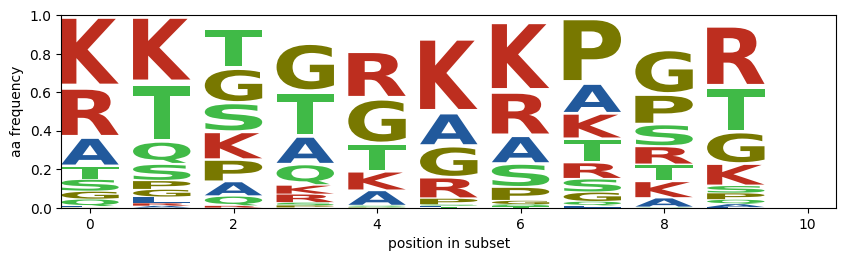

In [103]:
# How many of the top3?
topn = 3


df = spectra_dataframe.top1_internal_seq
if topn > 1:
    df = pd.concat([df, spectra_dataframe.top2_internal_seq])
if topn > 2:
    df = pd.concat([df, spectra_dataframe.top3_internal_seq])

# Finding the maximum length of the strings in the column
max_length = 10#df.str.len().max()
min_length = 10

# Creating a new dataframe to store the results
df_frequency = pd.DataFrame()
# Iterating over each position up to the maximum length
tt = df[(df.str.len() <= max_length) & (df.str.len() >= min_length) ]
print(tt)
for i in range(0, max_length+1):
    # Counting the frequency of each letter at position i
    frequency = tt.str[i].value_counts()
    # Adding the frequency to the new dataframe
    df_frequency[i] = frequency/sum(frequency)

# Displaying the frequency dataframe
df_frequency = df_frequency.fillna(0)
df_frequency

# Transposing and plotting logos
ww_df = df_frequency.T
ww_logo = logomaker.Logo(ww_df,
                         font_name='Stencil Std',
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8,
                         )
ww_logo.ax.set_ylabel('aa frequency')
ww_logo.ax.set_xlabel('position in subset')


In [57]:
df.str.len()

0        0
1        0
2        0
3        0
4        0
        ..
2386    13
2387     6
2388     6
2389    10
2390     0
Name: top1_internal_seq, Length: 2391, dtype: int64

In [92]:
logomaker.get_example_matrix('ww_information_matrix',
                                     print_description=False)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0.001592,0.001592,0.001592,0.001592,0.001592,0.001592,0.001592,0.001592,0.001592,4.013830,0.001592,0.001592,0.001592,0.001592,0.001592,0.001592,0.001592,0.068436,0.001592,0.001592
1,0.034975,0.001399,0.001399,0.020985,0.006995,0.012591,0.013990,0.001399,0.006995,0.012591,0.001399,0.012591,3.710129,0.022384,0.004197,0.013990,0.004197,0.002798,0.001399,0.001399
2,0.103247,0.018391,0.090664,0.137448,0.007098,0.020327,0.018714,0.002581,0.024844,0.019681,0.003226,0.020972,0.322647,0.030651,0.013229,0.118089,0.034523,0.011615,0.001291,0.022908
3,0.071196,0.000630,0.127271,0.094508,0.004410,1.462354,0.031503,0.002520,0.020162,0.014491,0.003150,0.153733,0.202247,0.028982,0.006931,0.032133,0.002520,0.010081,0.000630,0.001890
4,0.001046,0.001046,0.001046,0.001046,0.007325,0.001046,0.001046,0.001046,0.001046,0.002093,0.001046,0.001046,0.001046,0.001046,0.002093,0.001046,0.001046,0.002093,4.061442,0.051278
5,0.028139,0.017810,0.021728,0.652546,0.007124,0.007124,0.011398,0.055210,0.127873,0.017097,0.015316,0.008192,0.000356,0.087267,0.056991,0.089048,0.114338,0.085130,0.002493,0.008905
6,0.129428,0.010085,0.002241,0.366712,0.002801,0.003642,0.002801,0.035298,0.103654,0.013167,0.108697,0.000280,0.024093,0.084884,0.090487,0.034458,0.028295,0.071718,0.002241,0.004202
7,0.116421,0.036308,0.007027,0.012181,0.026938,0.018271,0.104006,0.022488,0.037245,0.032795,0.006793,0.006325,0.000234,0.046615,0.294683,0.015695,0.015695,0.062778,0.000234,0.079410
8,0.007131,0.000648,0.003501,0.019189,0.036175,0.001037,0.013095,0.038768,0.055623,0.043176,0.013744,0.003760,0.001556,0.022301,0.040324,0.011929,0.054975,0.065477,0.038768,0.047584
